In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math

# Reading the dataset

In [2]:
df=pd.read_csv("Sales_add.csv")

In [3]:
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


# Checking for null values in dataset

In [4]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

There are no null values in the dataset

In [5]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# Setting hypothesis

Null hypothesis, H0: The company clarifies there is no increase in sales after
stepping into digital marketing.

Alternative hypothesis, H1: The company clarifies  there is increase in sales after
stepping into digital marketing

In [6]:
var_bfr_add_digi=df["Sales_before_digital_add(in $)"].var()
var_bfr_add_digi

220345610.2359307

In [7]:
var_aftr_add_digi=df["Sales_After_digital_add(in $)"].var()
var_aftr_add_digi

653148853.7316018

C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


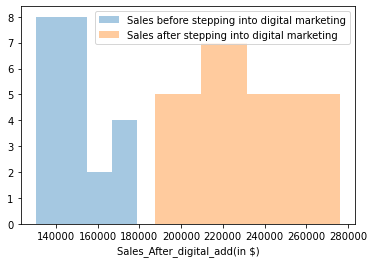

In [8]:
sns.distplot(df["Sales_before_digital_add(in $)"],kde=False,label="Sales before stepping into digital marketing")
sns.distplot(df["Sales_After_digital_add(in $)"],kde=False,label="Sales after stepping into digital marketing")
plt.legend()
plt.show()

The distribution plot shows that there is tremendous increase in sales after stepping to digital marketing.

# Test Statistics

In [9]:
from scipy.stats import ttest_ind 

In [10]:
alpha=0.05
t_score,p_value=ttest_ind(df["Sales_before_digital_add(in $)"],df["Sales_After_digital_add(in $)"])
print(f"tvalue:  {t_score}")
print(f"pvalue: {p_value}")

tvalue:  -12.995084451110877
pvalue: 2.614368006904645e-16


In [11]:
if(p_value>alpha):
    print("Failing to reject null hypothesis")
else:
    print("Rejecting null hypothesis")

Rejecting null hypothesis


Hence it is clear that stepping to digital marketing definitely increased the sales.

# The company needs to check whether there is any dependency between the features “Region” and “Manager”.

# Setting Hypothesis

Null hypothesis,H0: There is no dependancy between the features Region and Manager.

Alternative hypothesis, H1: There is dependancy between the features Region and Manager.

C:\Users\ollak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ollak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


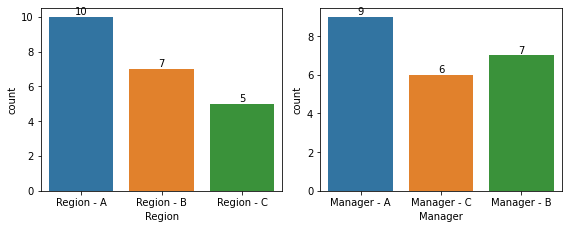

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)

ds=sns.countplot(df["Region"],data=df)
for i in ds.containers:
    ds.bar_label(i)
    
plt.subplot(2,2,2)  

ds=sns.countplot(df["Manager"],data=df)
for i in ds.containers:
    ds.bar_label(i)
    
plt.tight_layout()

The plot shows the data count of region and manager data.

# Here as we are comparing the categorical values ,we choose Chi-square test

In [13]:
mat1 = pd.crosstab(df['Region'],df['Manager'])
mat1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [14]:
mat1.values

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

These are the observed values

In [15]:
data = stats.chi2_contingency(mat1)
data

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

The matrix in the index 3 gives us the expected values.

In [16]:
expected=data[3]
expected

array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]])

These are the expected values.

In [17]:
#To find the degrees of freedom.
rows_count = len(mat1.iloc[:,:])
column_count = len(mat1.iloc[:,:])
df= (rows_count-1) *(column_count-1)
print('Degrees of freedom : ', df)
alpha= 0.05

Degrees of freedom :  4


# Conducting the chi square test with all the above values

In [18]:
from scipy.stats import chi2
chi_square= sum([(o-e)**2./e for o,e in zip(mat1,expected)])
chi_square_statistics = chi_square[0]+chi_square[1]+chi_square[2]

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U11'), dtype('float64')) -> None

In [ ]:
p_value = 1-chi2.cdf(x=chi_square_statistics,df= df)
print('P value: ', p_value)
print('Alpha level: ', alpha)
print('Degree of freedom: ', df)

In [ ]:
if p_value <= alpha:
    print('Reject null hypothesis.')
else:
    print('Fail to reject null hypothesis.')
    

Here we fail to reject null hypothesis.
Therefore is says that there is no relation between the region and manager of sales.